<a href="https://colab.research.google.com/github/darshanvjani/ERA_vision_nlp_ai/blob/main/Residual%20Connections%20and%20One%20Cycle%20Policy/Session_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/ERA/Session 10 - Residual Connections and One Cycle Policy

/content/drive/MyDrive/ERA/Session 10 - Residual Connections and One Cycle Policy


In [2]:
!git clone https://github.com/darshanvjani/torchcraft.git

fatal: destination path 'torchcraft' already exists and is not an empty directory.


In [3]:
!pip install albumentations

In [44]:
!pip install onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 55.1 MB/s eta 0:00:00


In [4]:
!pip install torch-lr-finder
from torchcraft import main
# from torchcraft.dataloader import albumentation
from torchcraft.utils import gradcam, helper, plot_metrics, test, train
# from torchcraft.model import resnet

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [31]:
import torch.nn as nn
import torch.optim as optim
import torch

In [6]:
m = main.main('cuda')

In [7]:
mean, std = helper.calculate_mean_std('CIFAR10')

Files already downloaded and verified


In [8]:
m.dataloading_aubumentation(mean , std, 512)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:14<00:00, 11814481.79it/s]


Extracting /content/cifar-10-python.tar.gz to /content
Files already downloaded and verified


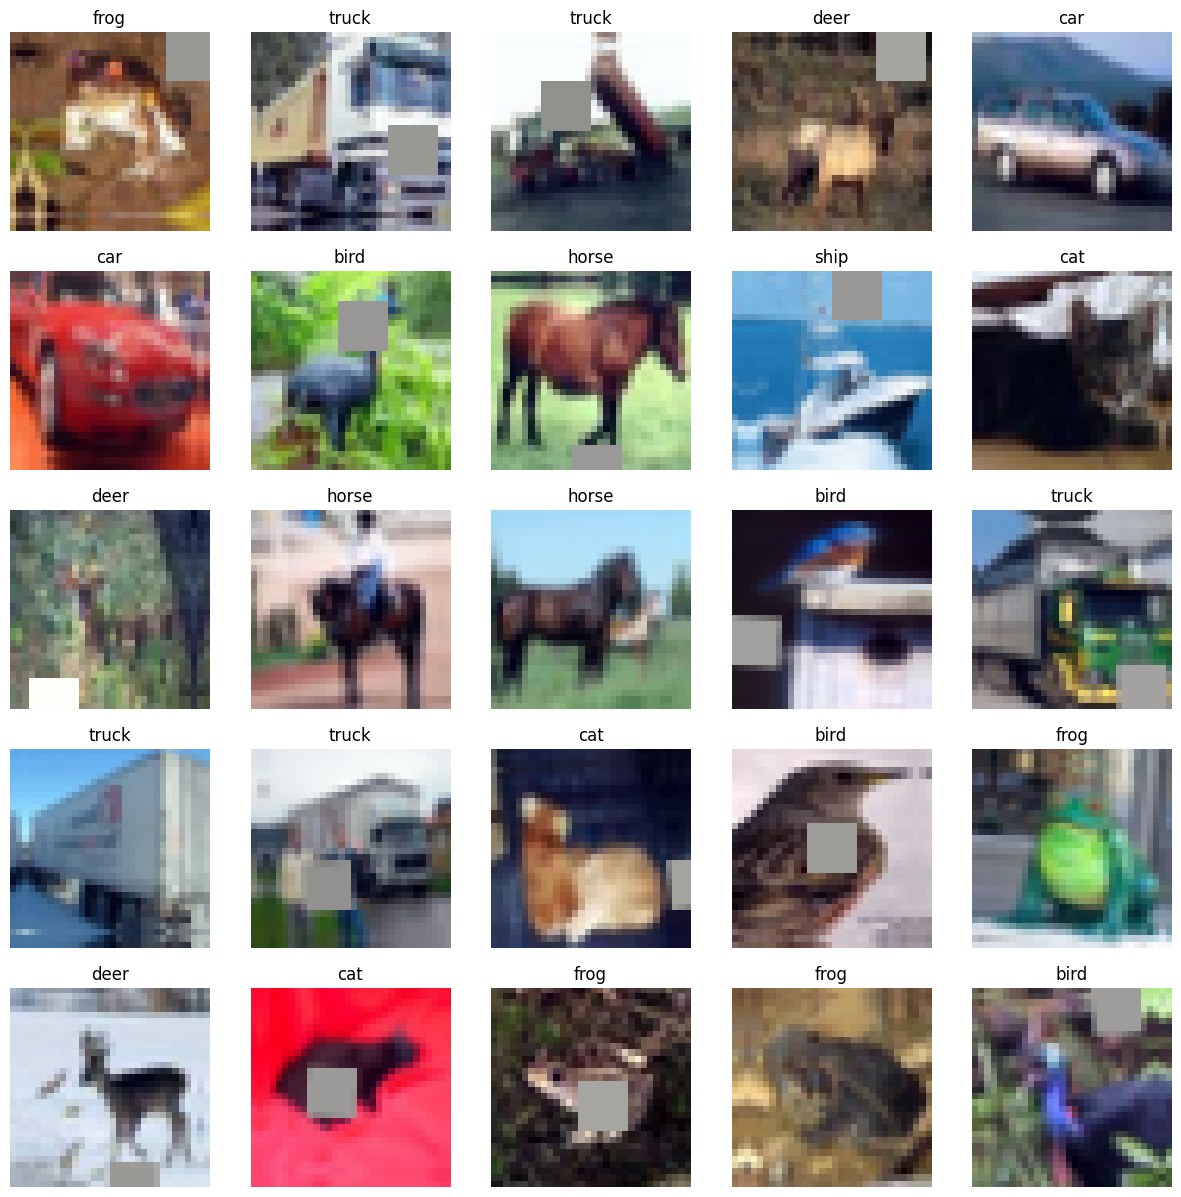

In [9]:
m.show_augmented_img(25)

In [22]:
net = m.model('davidc_stanford_dawnbench', 32, show_summery=True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 32, 32]          73,728
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-7, weight_decay=1e-2)

  0%|          | 0/400 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.34E-04


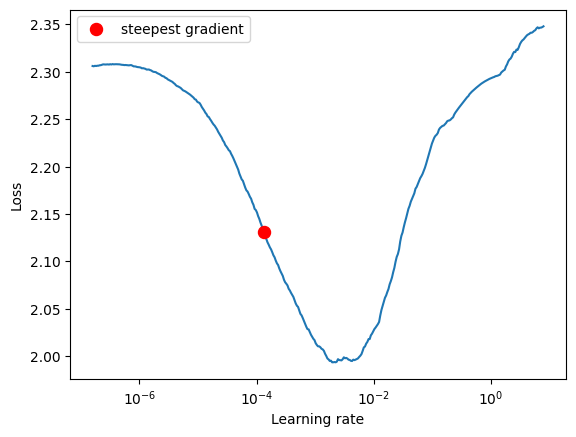

In [24]:
m.lr_finder(optimizer, criterion)

In [25]:
len(m.train_dataloader)

98

In [26]:
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import OneCycleLR

In [27]:
optimizer_ = optim.Adam(net.parameters(), lr=1e-7, weight_decay=1e-2)
epochs_ = 24
scheduler_ = OneCycleLR(optimizer_, max_lr=1.34E-04, steps_per_epoch=98, pct_start=5/epochs_, three_phase=False, div_factor=100, final_div_factor=100, epochs=epochs_)
criterian_ = nn.CrossEntropyLoss()
reg = 0

Loss=2.1601779460906982 Batch_id=97 LR=0.00001 Accuracy=18.14: 100%|██████████| 98/98 [00:35<00:00,  2.80it/s]



Test set: Average loss: 0.0044, Accuracy: 2754/10000 (27.54%)



Loss=2.0473294258117676 Batch_id=97 LR=0.00005 Accuracy=36.68: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]



Test set: Average loss: 0.0040, Accuracy: 4557/10000 (45.57%)



Loss=1.886222243309021 Batch_id=97 LR=0.00009 Accuracy=51.66: 100%|██████████| 98/98 [00:35<00:00,  2.77it/s]



Test set: Average loss: 0.0038, Accuracy: 5583/10000 (55.83%)



Loss=1.8397706747055054 Batch_id=97 LR=0.00012 Accuracy=59.23: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]



Test set: Average loss: 0.0037, Accuracy: 6097/10000 (60.97%)



Loss=1.8063337802886963 Batch_id=97 LR=0.00013 Accuracy=64.20: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]



Test set: Average loss: 0.0037, Accuracy: 6161/10000 (61.61%)



Loss=1.7761632204055786 Batch_id=97 LR=0.00013 Accuracy=68.15: 100%|██████████| 98/98 [00:35<00:00,  2.76it/s]



Test set: Average loss: 0.0037, Accuracy: 6341/10000 (63.41%)



Loss=1.7467436790466309 Batch_id=97 LR=0.00013 Accuracy=70.95: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]



Test set: Average loss: 0.0036, Accuracy: 6964/10000 (69.64%)



Loss=1.7068043947219849 Batch_id=97 LR=0.00013 Accuracy=73.59: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]



Test set: Average loss: 0.0035, Accuracy: 7537/10000 (75.37%)



Loss=1.6880587339401245 Batch_id=97 LR=0.00012 Accuracy=78.60: 100%|██████████| 98/98 [00:35<00:00,  2.78it/s]



Test set: Average loss: 0.0034, Accuracy: 7897/10000 (78.97%)



Loss=1.643589973449707 Batch_id=97 LR=0.00011 Accuracy=81.07: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]



Test set: Average loss: 0.0034, Accuracy: 7991/10000 (79.91%)



Loss=1.6707260608673096 Batch_id=97 LR=0.00010 Accuracy=82.60: 100%|██████████| 98/98 [00:35<00:00,  2.80it/s]



Test set: Average loss: 0.0033, Accuracy: 8070/10000 (80.70%)



Loss=1.6271836757659912 Batch_id=97 LR=0.00009 Accuracy=83.84: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]



Test set: Average loss: 0.0033, Accuracy: 8231/10000 (82.31%)



Loss=1.6126909255981445 Batch_id=97 LR=0.00008 Accuracy=85.22: 100%|██████████| 98/98 [00:34<00:00,  2.82it/s]



Test set: Average loss: 0.0033, Accuracy: 8274/10000 (82.74%)



Loss=1.6033827066421509 Batch_id=97 LR=0.00007 Accuracy=86.44: 100%|██████████| 98/98 [00:35<00:00,  2.74it/s]



Test set: Average loss: 0.0033, Accuracy: 8368/10000 (83.68%)



Loss=1.6010301113128662 Batch_id=97 LR=0.00006 Accuracy=87.31: 100%|██████████| 98/98 [00:35<00:00,  2.79it/s]



Test set: Average loss: 0.0033, Accuracy: 8473/10000 (84.73%)



Loss=1.5673699378967285 Batch_id=97 LR=0.00005 Accuracy=88.49: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]



Test set: Average loss: 0.0032, Accuracy: 8568/10000 (85.68%)



Loss=1.5830183029174805 Batch_id=97 LR=0.00004 Accuracy=89.58: 100%|██████████| 98/98 [00:35<00:00,  2.77it/s]



Test set: Average loss: 0.0032, Accuracy: 8529/10000 (85.29%)



Loss=1.590906023979187 Batch_id=97 LR=0.00003 Accuracy=90.54: 100%|██████████| 98/98 [00:35<00:00,  2.77it/s]



Test set: Average loss: 0.0032, Accuracy: 8744/10000 (87.44%)



Loss=1.5427398681640625 Batch_id=97 LR=0.00002 Accuracy=91.55: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]



Test set: Average loss: 0.0032, Accuracy: 8789/10000 (87.89%)



Loss=1.542548418045044 Batch_id=97 LR=0.00001 Accuracy=92.38: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]



Test set: Average loss: 0.0032, Accuracy: 8862/10000 (88.62%)



Loss=1.5415560007095337 Batch_id=97 LR=0.00001 Accuracy=93.06: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]



Test set: Average loss: 0.0032, Accuracy: 8947/10000 (89.47%)



Loss=1.540077567100525 Batch_id=97 LR=0.00000 Accuracy=93.61: 100%|██████████| 98/98 [00:34<00:00,  2.81it/s]



Test set: Average loss: 0.0032, Accuracy: 8989/10000 (89.89%)



Loss=1.5170530080795288 Batch_id=97 LR=0.00000 Accuracy=93.83: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]



Test set: Average loss: 0.0032, Accuracy: 8990/10000 (89.90%)



Loss=1.533485770225525 Batch_id=97 LR=0.00000 Accuracy=93.91: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]



Test set: Average loss: 0.0032, Accuracy: 8986/10000 (89.86%)



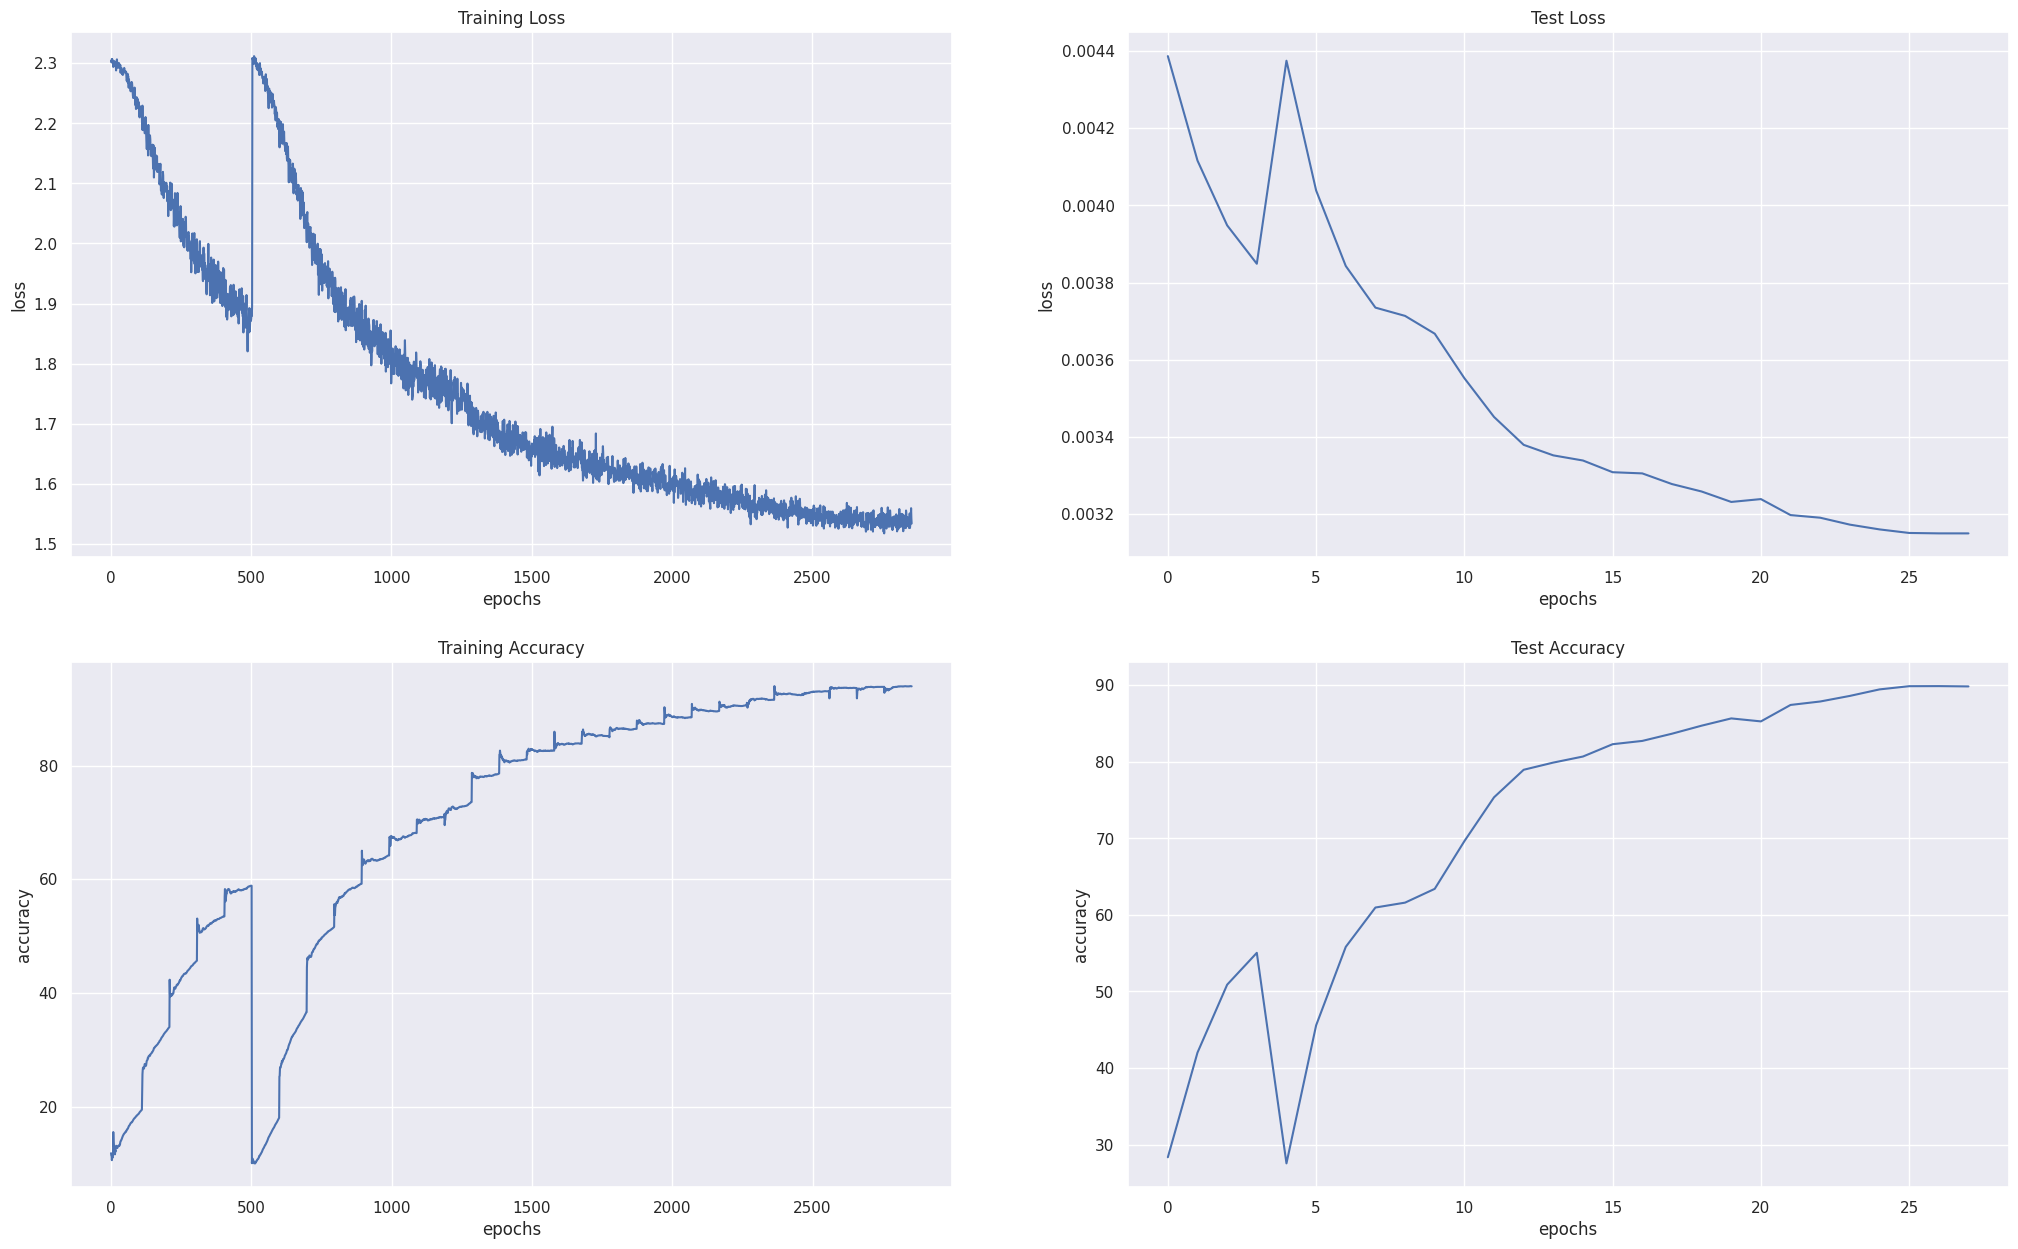

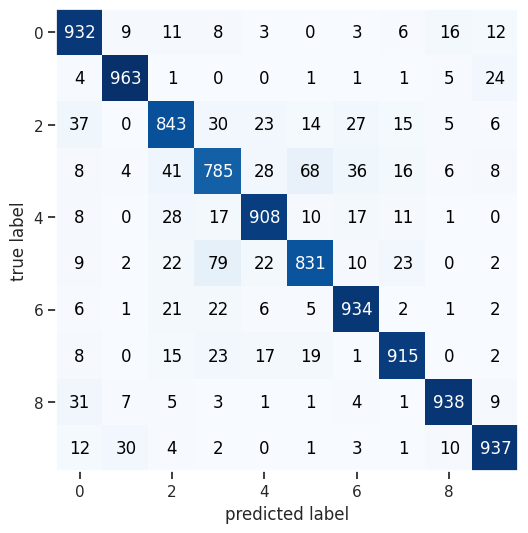

In [28]:
m.train_model(optimizer=optimizer_, epochs=epochs_ , criterian=criterian_, schedular=scheduler_, lam_reg=reg)

Total wrong predictions are 1014


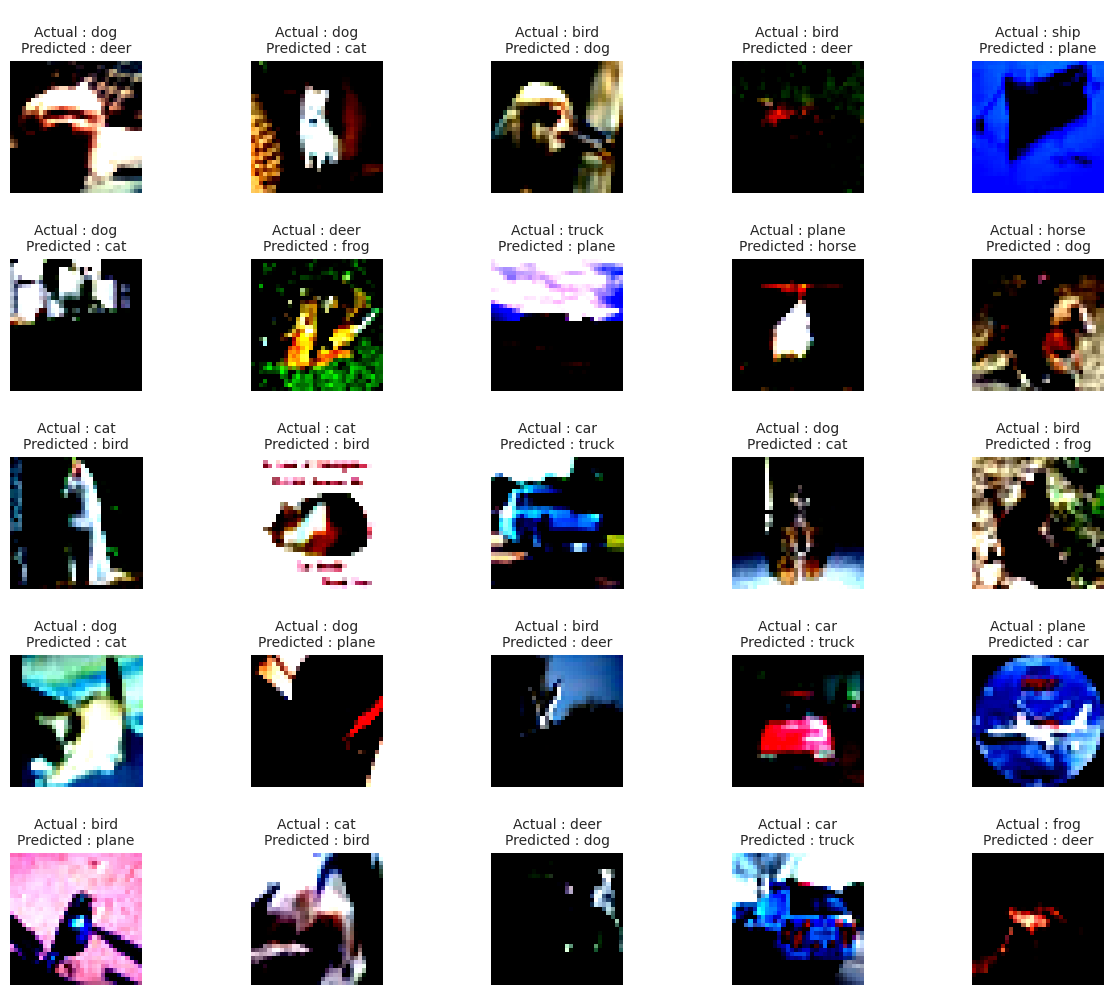

torch.Size([10, 10])
Generating Grad-CAM @prelayer
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @output


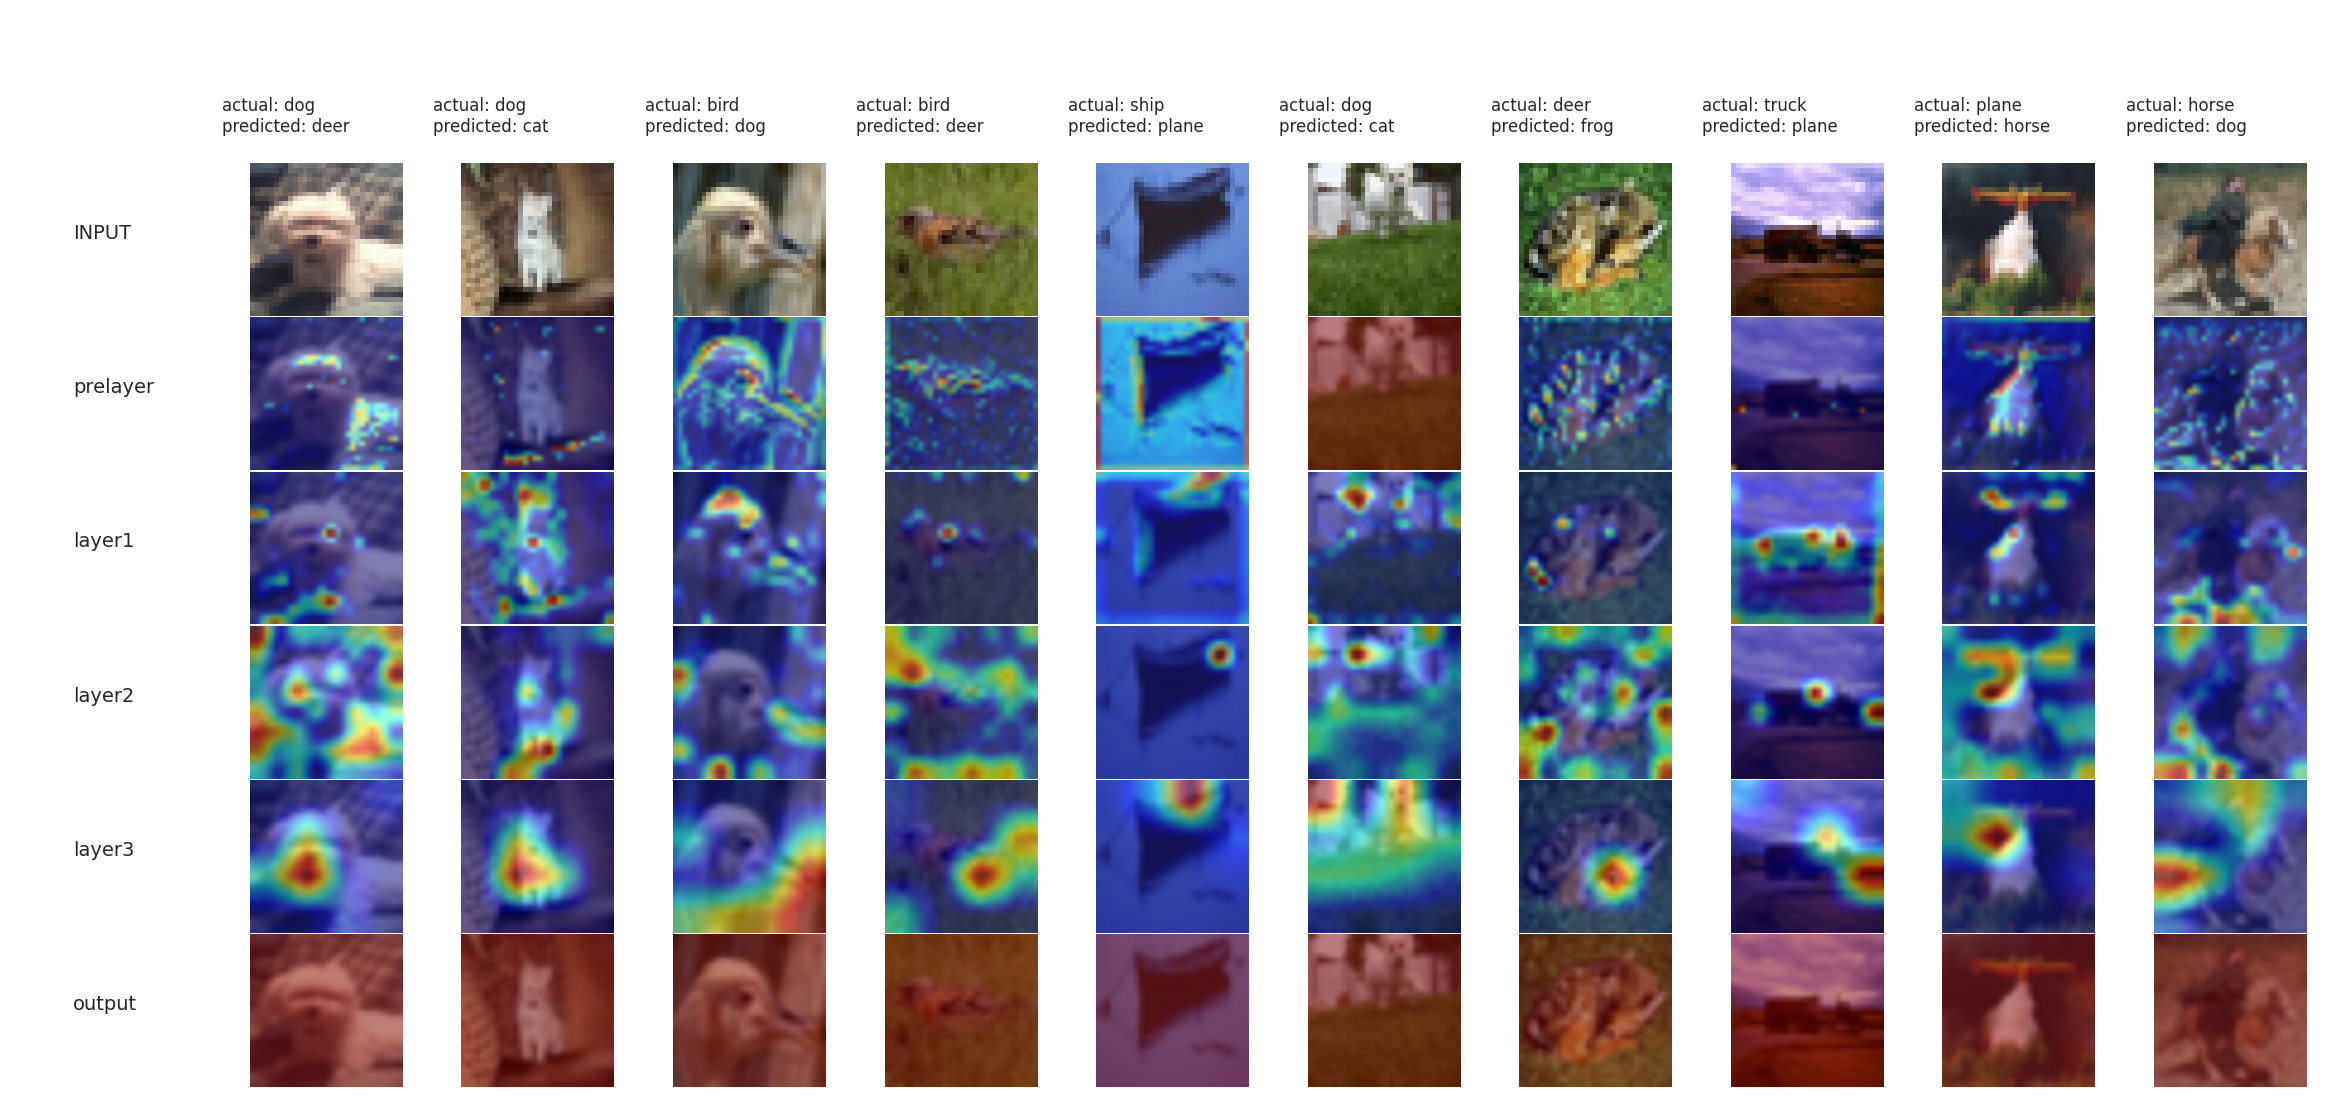

In [29]:
m.examination(25)

In [45]:
dummy_input = torch.autograd.Variable(torch.randn(1, 3, 32, 32))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
dummy_input = dummy_input.to(device)

input_names = [ "data" ]
output_names = [ "output" ]
torch.onnx.export(net, dummy_input, 'cifar10_custom_resnet.onnx', input_names=input_names, output_names=output_names)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

